In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import datetime

In [2]:
import matplotlib.style as style
plt.style.use("markerr.mplstyle")

In [3]:
texas_data = pd.read_csv('merged_texas_data.csv', index_col = 0,
                   parse_dates = ['Time']
                  )

econ = pd.read_csv('key_econ.csv', index_col = 0,
                  parse_dates = ['Time'])

In [4]:
econ = econ[['Time','Consumer Confidence Index TX', 
      'Consumer Price Index TX', 'Unemployment TX', 
      'Gross Value Natural Gas Production',]]
econ

,Time,Consumer Confidence Index TX,Consumer Price Index TX,Unemployment TX,Gross Value Natural Gas Production
0,2012-01-01,NaN,205.281,7.1,2757.83
1,2012-01-01,NaN,205.281,7.1,2757.83
2,2012-01-01,NaN,205.281,7.1,2757.83
3,2012-01-01,NaN,205.281,7.1,2757.83
4,2012-01-01,NaN,205.281,7.1,2757.83
...,...,...,...,...,...
24935,2021-08-01,121.4,NaN,NaN,NaN
24936,2021-08-01,121.4,NaN,NaN,NaN
24937,2021-08-01,121.4,NaN,NaN,NaN
24938,2021-08-01,121.4,NaN,NaN,NaN


In [5]:
texas_data['tx_net_approve'] = (texas_data['tx_is_better'] - 
                                              texas_data['tx_is_worse'])
texas_data = texas_data[['Time','tx_net_approve', 
                   'sap_case_shiller_index',]]


In [6]:
econ_polling = econ.groupby('Time').mean().reset_index().merge(
    texas_data.groupby('Time').mean().reset_index(), on = 'Time')

In [7]:
econ_polling = econ_polling.dropna()

In [8]:
econ_polling.columns

Index(['Time', 'Consumer Confidence Index TX', 'Consumer Price Index TX',
       'Unemployment TX', 'Gross Value Natural Gas Production',
       'tx_net_approve', 'sap_case_shiller_index'],
      dtype='object')

In [9]:
econ_polling

,Time,Consumer Confidence Index TX,Consumer Price Index TX,Unemployment TX,Gross Value Natural Gas Production,tx_net_approve,sap_case_shiller_index
5,2012-06-01,104.8,208.372,6.8,1961.60,-13.0,143.174
6,2012-07-01,93.7,207.881,6.7,2336.97,-13.0,144.285
7,2012-08-01,75.1,208.201,6.6,2573.92,-13.0,144.707
8,2012-09-01,83.7,209.451,6.5,2324.52,-13.0,144.359
9,2012-10-01,92.0,209.044,6.5,2629.16,-11.0,143.968
...,...,...,...,...,...,...,...
109,2021-02-01,98.9,238.141,6.9,4996.12,-11.0,239.210
110,2021-03-01,125.5,240.542,6.9,3228.00,-6.0,243.937
111,2021-04-01,127.5,242.815,6.7,3017.95,-2.0,249.611
112,2021-05-01,131.5,244.864,6.6,3419.56,-2.0,255.298


In [10]:
# econ_polling = econ_polling.set_index('Time').pct_change(periods = 12).reset_index()

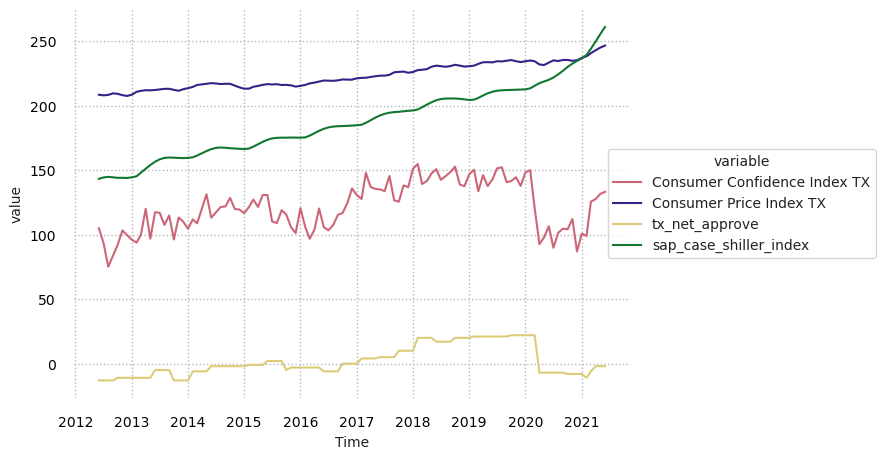

In [11]:

graph_df = pd.melt(econ_polling, id_vars=['Time'], value_vars=['Consumer Confidence Index TX', 'Consumer Price Index TX',
       'tx_net_approve',  'sap_case_shiller_index'])
g = sns.lineplot(data = graph_df, x = 'Time',y = 'value', hue = 'variable')
sns.move_legend(g, loc = 'center', bbox_to_anchor = (1.2,.5))
plt.show()

In [13]:
graph_df

,Time,variable,value
0,2012-06-01,Consumer Confidence Index TX,104.800
1,2012-07-01,Consumer Confidence Index TX,93.700
2,2012-08-01,Consumer Confidence Index TX,75.100
3,2012-09-01,Consumer Confidence Index TX,83.700
4,2012-10-01,Consumer Confidence Index TX,92.000
...,...,...,...
431,2021-02-01,sap_case_shiller_index,239.210
432,2021-03-01,sap_case_shiller_index,243.937
433,2021-04-01,sap_case_shiller_index,249.611
434,2021-05-01,sap_case_shiller_index,255.298


In [ ]:
fig, ax = plt.subplots()
g = sns.lineplot(data = zori_pred[zori_pred['zip_code']==75052], 
                 x = 'Time',y = 'zori_ssa', 
                 hue = 'model_code', ci = None, linewidth=3,
                ax = ax, 
#                  palette = colors3
                )
# axis spine options are ['left','right','bottom','top']
ax.spines['bottom'].set_visible(True)
# make the highlighted features bold. should be the same side with the visible spine
plt.xticks(fontweight='bold')
# remove x axis grid lines that were cluttering the graph
ax.grid(b = None, axis = 'x')

g.set(xlabel='', ylabel='',title=f'Zillow Rent Index (RI) \n')

# # legend
# acutal_patch = mpatches.Patch(color=colors3[0], 
#                            label='Actual RI')
# lasso_patch = mpatches.Patch(color=colors3[1], 
#                            label='Lasso Predicted RI')
# rf_patch = mpatches.Patch(color=colors3[2], 
#                            label='Random Forrest Predicted RI')
# plt.legend(handles=[acutal_patch,lasso_patch,rf_patch],
#            loc='center left', 
#            bbox_to_anchor=(-0.02, 1),frameon=False,ncol=2,
#                 title = '')


# g.set_yticklabels(labels = ['','$1,300','$1,350','$1,400',
#                            '$1,450','$1,500','$1,550','$1,600'])

# add information from before 2016
# can we have this be percent increase
# fix the y axis to have dollar signs
plt.show()